# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
arq_base = pd.read_csv('demo01_tratado.csv')

In [3]:
arq_base.head(10)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,0
1,1,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0
2,3,0,1,1,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,0
3,4,1,1,0,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,0
4,6,1,0,1,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,0
5,8,1,0,1,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,0
6,10,0,1,1,3,Working,Secondary / secondary special,Married,House / apartment,34.764384,3.186301,1,0,0,0,5.0,0
7,11,0,0,1,1,Commercial associate,Higher education,Married,House / apartment,32.443836,5.523288,1,0,0,0,3.0,0
8,14,0,1,1,0,Commercial associate,Secondary / secondary special,Married,House / apartment,56.169863,12.191781,1,0,1,0,2.0,0
9,19,1,1,1,2,Working,Secondary / secondary special,Married,House / apartment,43.180822,8.693151,1,0,0,0,4.0,0


In [4]:
arq_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6770 non-null   int64  
 1   sexo                   6770 non-null   int64  
 2   posse_de_veiculo       6770 non-null   int64  
 3   posse_de_imovel        6770 non-null   int64  
 4   qtd_filhos             6770 non-null   int64  
 5   tipo_renda             6770 non-null   object 
 6   educacao               6770 non-null   object 
 7   estado_civil           6770 non-null   object 
 8   tipo_residencia        6770 non-null   object 
 9   idade                  6770 non-null   float64
 10  tempo_emprego          6770 non-null   float64
 11  possui_celular         6770 non-null   int64  
 12  possui_fone_comercial  6770 non-null   int64  
 13  possui_fone            6770 non-null   int64  
 14  possui_email           6770 non-null   int64  
 15  qt_p

In [5]:
arq_base_encoded = pd.get_dummies(arq_base, columns=['educacao', 'estado_civil','tipo_renda','tipo_residencia'], drop_first=True)

In [6]:
arq_base_encoded.dtypes

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8
estado_civil_Married                        uint8
estado_civil_Separated                      uint8
estado_civil_Single / not married           uint8


In [7]:
arq_base_encoded.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Widow,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,0,0,0,1,1,0,0,0,0
3,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,6,1,0,1,0,27.482192,4.024658,1,0,1,...,0,0,0,0,1,1,0,0,0,0


In [8]:
arq_base_encoded = arq_base_encoded.drop('Unnamed: 0', axis=1) # como não foi encontrado signficado para Unnamed, a mesma foi deletada
arq_base_encoded.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Widow,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
3,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,1,0,27.482192,4.024658,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [9]:
#Separando as variáveis
y = arq_base_encoded.mau

X = arq_base_encoded.drop('mau', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6765    1
6766    1
6767    1
6768    1
6769    1
Name: mau, Length: 6770, dtype: int64

In [11]:
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Widow,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
3,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,1,0,27.482192,4.024658,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,0,1,1,34.857534,3.101370,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
6766,1,0,1,0,54.109589,9.884932,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
6767,1,0,1,0,43.389041,7.380822,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
6768,0,1,1,0,30.005479,9.800000,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
#1
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [13]:
#2
clf=clf.fit(X_train, y_train)

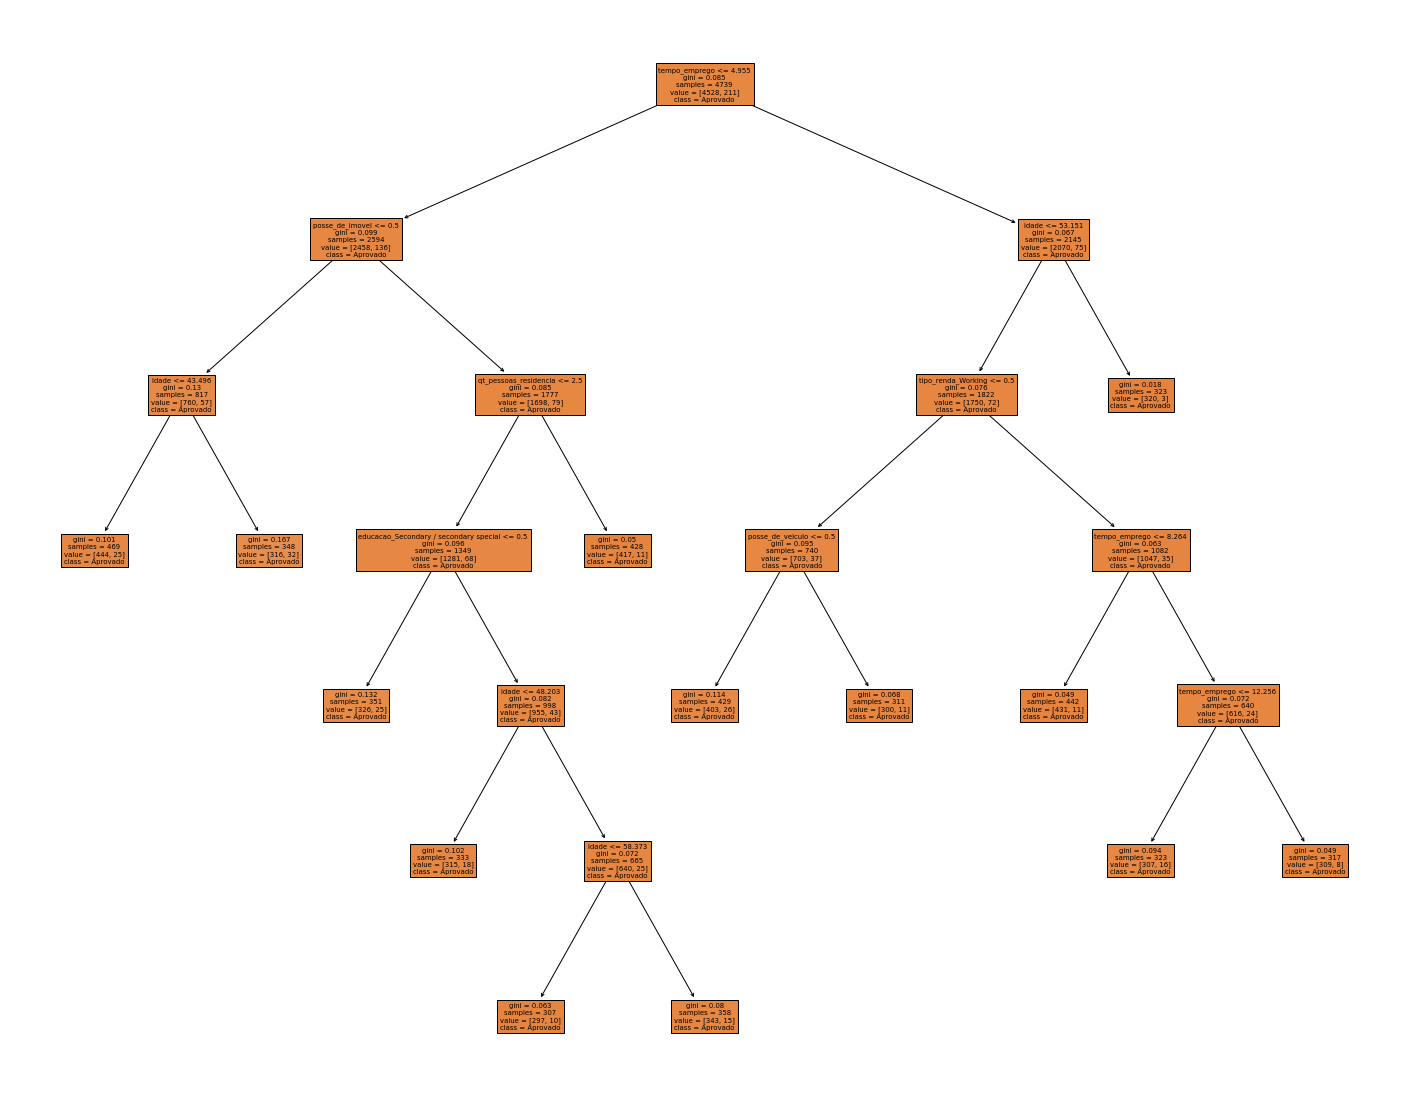

In [17]:
#3
plt.figure(figsize=(25,20))
plot_tree(clf,
          filled = True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns);

Como a árvore da base de dados, apresenta uma extensa profundidade, o que dificulta a sua vizualização. Assim, foi realizdo podagem da árvore, tanto em profundidade, quanto pelo valor das amostras das folhas.

Agora temos uma profundidade de 8, Amostras de valor mínimo de 300

In [15]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=300, random_state=100)
clf = clf.fit(X_train,y_train)


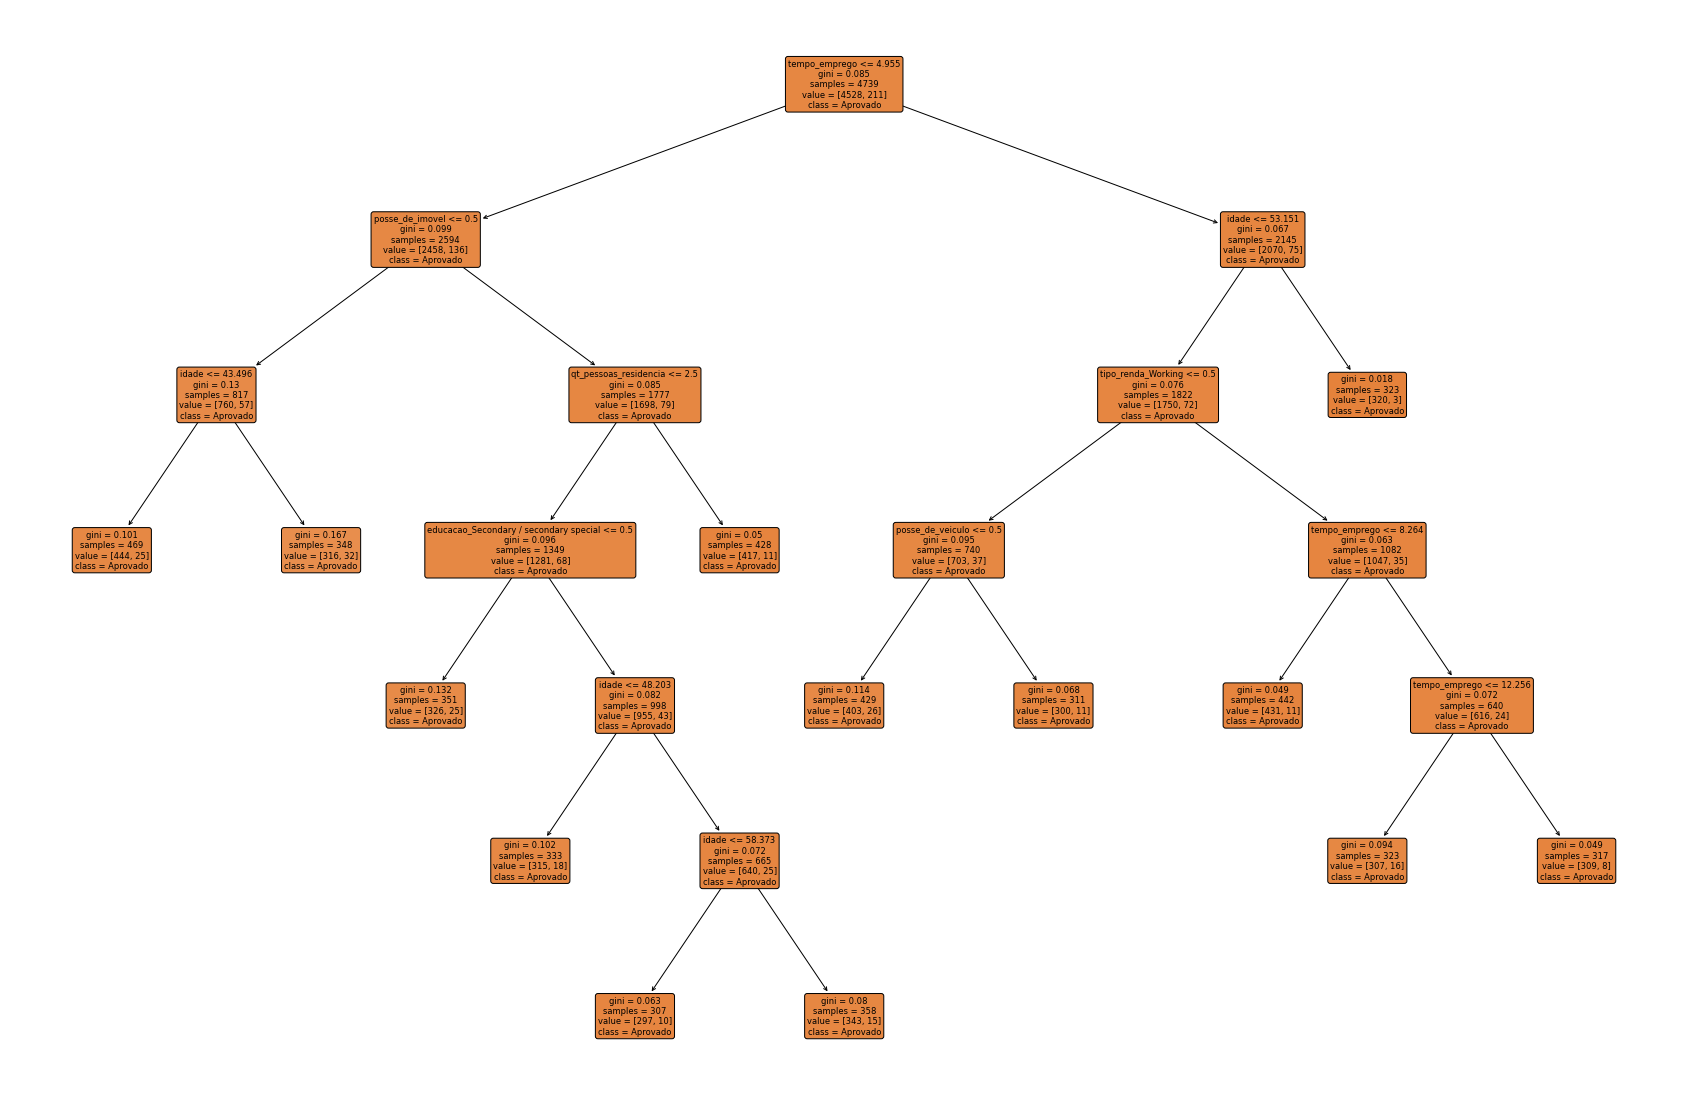

In [16]:
plt.figure(figsize=[30,20])
plot_tree(clf,
          filled = True,
          rounded=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X_train.columns);

C:\Users\renat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


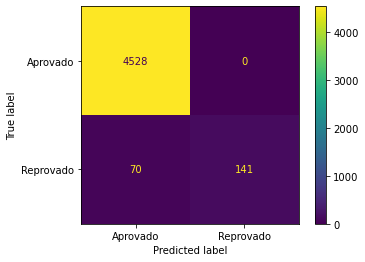

In [25]:
#4
clf = DecisionTreeClassifier(random_state=100)
clf=clf.fit(X_train, y_train)
predict = clf.predict(X_test)
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado']);

In [28]:
#5
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

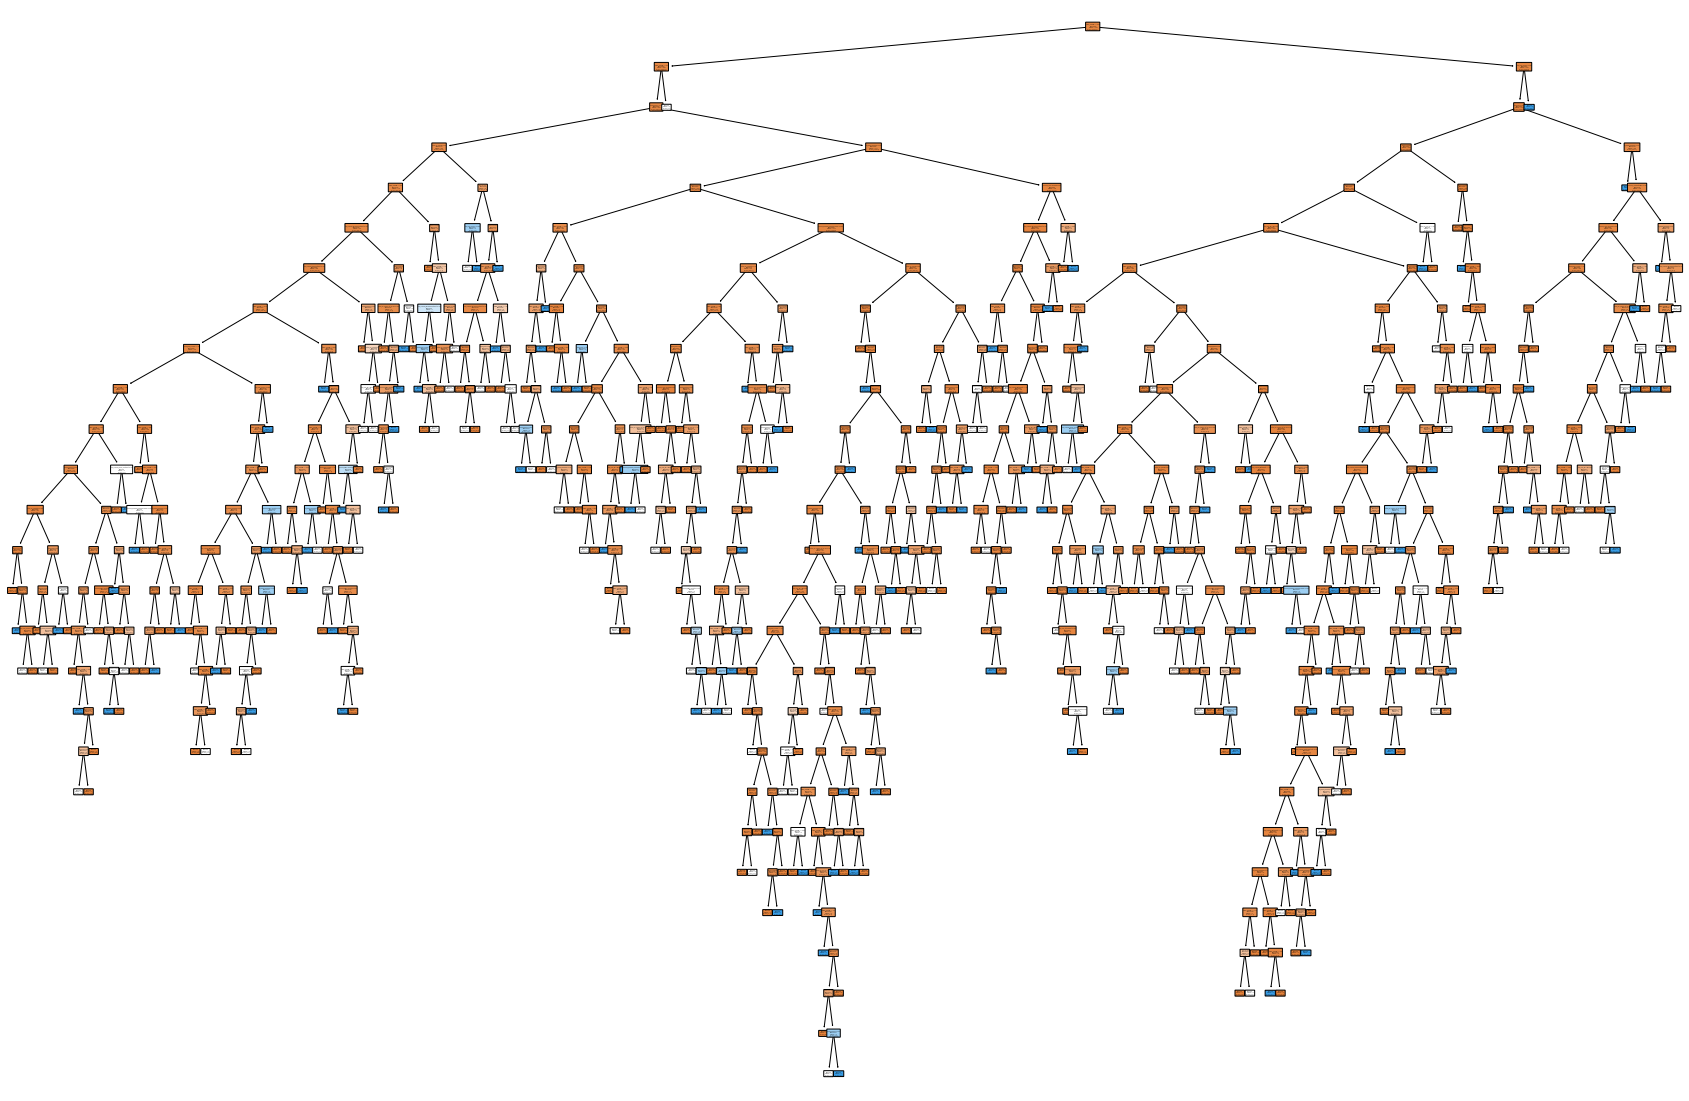

In [26]:
#1
plt.figure(figsize=[30,20])
plot_tree(clf,
          filled = True,
          rounded=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X_test.columns);

C:\Users\renat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


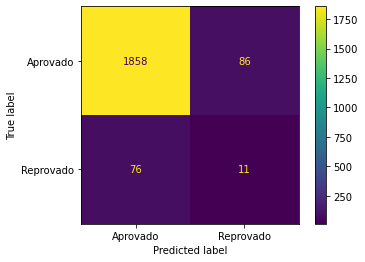

In [27]:
#2
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado']);

In [29]:
#3
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9202363367799113

Pode-se observar que Acurácia da base de treino (0.985) é maior que a Acurácia da base de teste (0.920), o que leva a deduzir que a base de treino tem uma maior chance de realizar a classificação de classes de maneira correta

In [31]:
#4
clf_pre_pruning = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pre_pruning = clf_pre_pruning.fit(X_train,y_train)



In [35]:
y_pre_pruning = clf_pre_pruning.predict(X_train)

print(f'Quantidade de Aprovados: {list(y_pre_pruning).count(0)}')
print(f'Quantidade de Reprovados: {list(y_pre_pruning).count(1)}')

Quantidade de Aprovados: 4712
Quantidade de Reprovados: 27


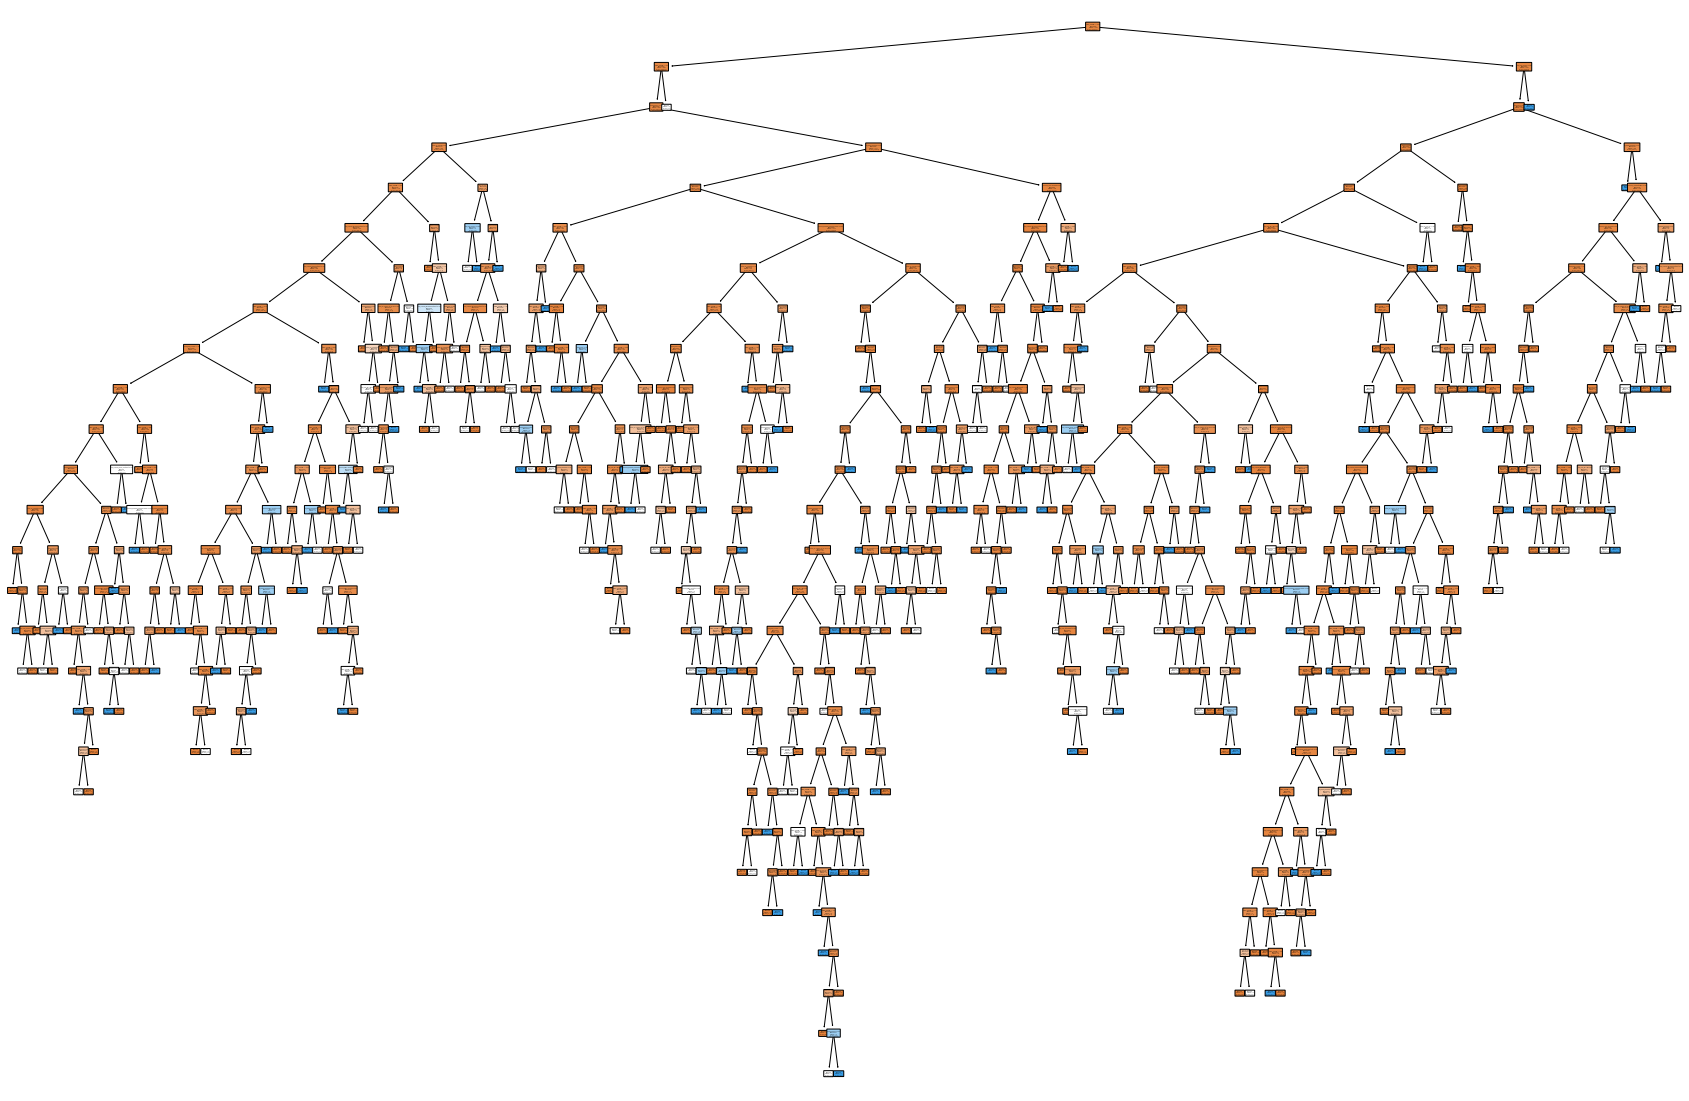

In [36]:
plt.figure(figsize=[30,20])
plot_tree(clf,
          filled = True,
          rounded=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X_train.columns);

In [37]:
y_train.loc[y_train == 1] = 0

predict = clf_pre_pruning.predict(X_train)

accuracy_score(y_train, predict)

0.9943025954842794

A acurácia ficaria bem proximo de 1, sugerindo um Overfitting